In [1]:
import numpy as np, plottools as pl, healpy as hp, binning as bn, analysis as ana, tools_qrec, curvedsky as cs, pickle, local, tools_cmb, tools_cib
from matplotlib.pyplot import *
import warnings
from scipy.signal import savgol_filter
warnings.filterwarnings("ignore")

In [2]:
aobj = local.init_analysis(freq='143',dtype='full',wind='G40')

In [3]:
qobj = tools_qrec.init_quad(aobj.snmax,ids=local.ids,rlz=aobj.rlz,stag=aobj.stag,qtypes=['lens'],rlmin=100,rlmax=2048)['lens']

In [4]:
iobj = tools_cib.init_cib(wind=aobj.wind)

In [5]:
xobj = tools_qrec.cross(qobj,iobj)

In [6]:
L, ilTT = np.loadtxt(xobj.fcli['TT'][0],unpack=True,usecols=(0,1))
L, ilTE = np.loadtxt(xobj.fcli['TE'][0],unpack=True,usecols=(0,1))

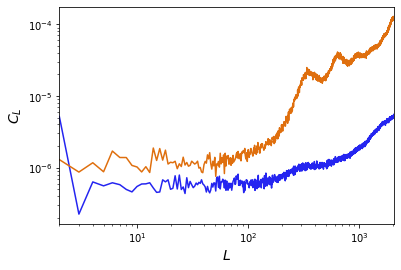

In [7]:
pl.plot_1dstyle(xmin=2,xmax=aobj.lmax,xlog=True,ylog=True)
plot(L,ilTT)
plot(L,ilTE)

#### rec x rec

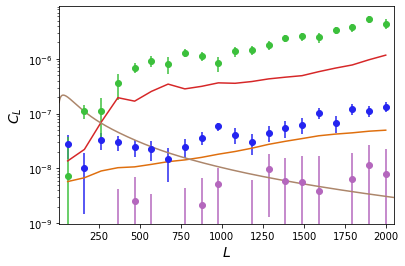

In [8]:
# obs (ckk+nkk) - sim (ckk+nkk)
mb = bn.multipole_binning(20,lmin=10,lmax=2048)
pl.plot_1dstyle(xmin=mb.lmin,xmax=mb.lmax,ylog=True)
mcb, vcb, scb, ocb = {}, {}, {}, {}
for i, q in enumerate(['TT','TE']):
    al = (np.loadtxt(qobj.f[q].al)).T[1]
    vl = al/np.sqrt(qobj.l+1e-30)
    mcb[q], vcb[q], scb[q], ocb[q] = bn.binned_spec(mb,xobj.fcli[q],cn=1,opt=True,vl=vl)
    errorbar(mb.bc,ocb[q]-mcb[q],yerr=vcb[q],fmt='o')
    plot(mb.bc,mcb[q]/99.)
mcb0, vcb0, scb0, ocb0 = bn.binned_spec(mb,xobj.fcli[q],cn=4,opt=True,vl=vl)
errorbar(mb.bc,ocb0-mcb0,yerr=vcb0,fmt='o')
plot(aobj.l,aobj.ckk)
axhline(0,color='k',ls='--')

#### rec x input

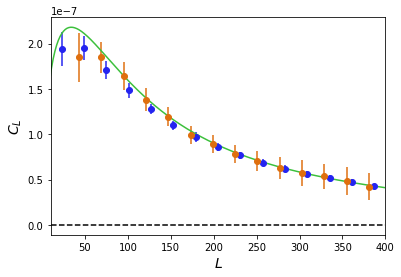

In [9]:
mb = bn.multipole_binning(15,lmin=10,lmax=400)
pl.plot_1dstyle(xmin=mb.lmin,xmax=mb.lmax)
mcb, vcb, scb, ocb = {}, {}, {}, {}
for i, q in enumerate(['TT','TE']):
    vl = (np.loadtxt(qobj.f[q].al)).T[1] / np.sqrt(qobj.l+1e-30)
    mcb[q], vcb[q], scb[q] = bn.binned_spec(mb,xobj.fcli[q],cn=2,opt=True,doreal=False,vl=vl)
    errorbar(mb.bc+i*20,mcb[q],yerr=vcb[q],fmt='o')
plot(aobj.l,aobj.ckk)
axhline(0,color='k',ls='--')

#### rec x official

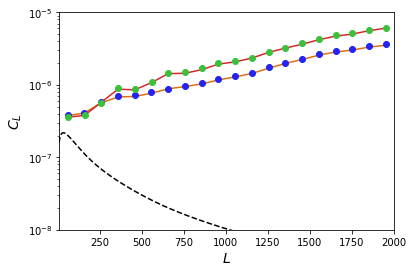

In [10]:
mb = bn.multipole_binning(20,lmin=10,lmax=2000)
pl.plot_1dstyle(xmin=mb.lmin,xmax=mb.lmax,ylog=True,ymin=1e-8,ymax=1e-5)
mcb, vcb, scb, ocb = {}, {}, {}, {}
for i, q in enumerate(['TT','TE']):
    kk = savgol_filter( (np.loadtxt(xobj.fcli[q][0])).T[4], 51, 3)
    al = (np.loadtxt(qobj.f[q].al)).T[1]
    vl = np.sqrt(al*kk)/np.sqrt(qobj.l+1e-30)
    mcb[q], vcb[q], scb[q], ocb[q] = bn.binned_spec(mb,xobj.fcli[q],cn=3,opt=True,vl=vl)
    errorbar(mb.bc+i,ocb[q],yerr=vcb[q],fmt='o')
    plot(mb.bc+i,mcb[q])
plot(aobj.l,aobj.ckk,color='k',ls='--')

#### lens x cib

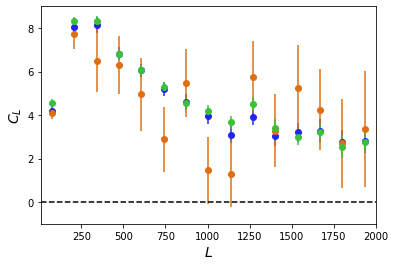

In [11]:
s = 10*2.726e6*mb.bc*2
s = 0.0059757149*9113.0590*1e6*2.726
mb = bn.multipole_binning(15,lmin=10,lmax=2000)
#pl.plot_1dstyle(xmin=mb.lmin,xmax=mb.lmax,ymin=-.5,ymax=4.5)
pl.plot_1dstyle(xmin=mb.lmin,xmax=mb.lmax,ymin=-1,ymax=9)
mIkTT, vIkTT, sIkTT, oIkTT = bn.binned_spec(mb,xobj.fcli['TT'],cn=5,lfac=aobj.l)
mIkTE, vIkTE, sIkTE, oIkTE = bn.binned_spec(mb,xobj.fcli['TE'],cn=5,lfac=aobj.l)
mIk18, vIk18, sIk18, oIk18 = bn.binned_spec(mb,xobj.fcli['TT'],cn=7,lfac=aobj.l)
errorbar(mb.bc,oIkTT*s,yerr=vIkTT*s,fmt='o')
errorbar(mb.bc,oIkTE*s,yerr=vIkTE*s,fmt='o')
errorbar(mb.bc,oIk18*s,yerr=vIk18*s,fmt='o')
axhline(0,color='k',ls='--')